<a href="https://colab.research.google.com/github/AsmaSalmantech/final-project-datascience/blob/main/ALab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training with init=small_std, optimizer=SGD


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Training with init=small_std, optimizer=SGD_Momentum
Training with init=small_std, optimizer=Adam
Training with init=large_std1, optimizer=SGD
Training with init=large_std1, optimizer=SGD_Momentum
Training with init=large_std1, optimizer=Adam
Training with init=large_std10, optimizer=SGD
Training with init=large_std10, optimizer=SGD_Momentum
Training with init=large_std10, optimizer=Adam
Training with init=zeros, optimizer=SGD
Training with init=zeros, optimizer=SGD_Momentum
Training with init=zeros, optimizer=Adam


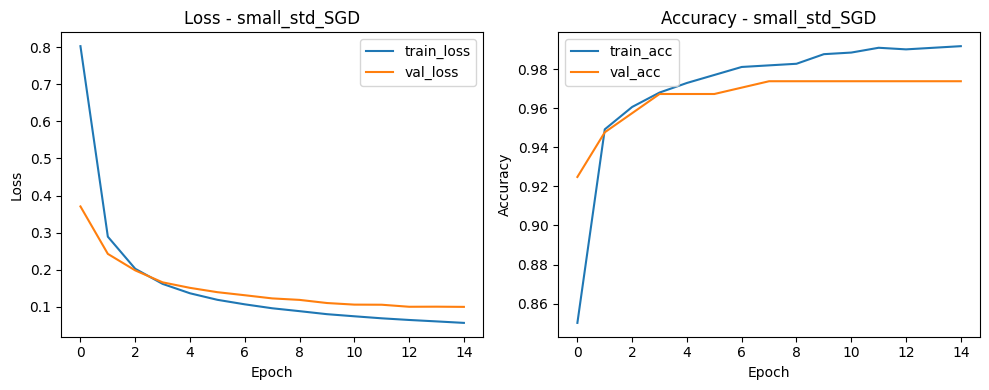

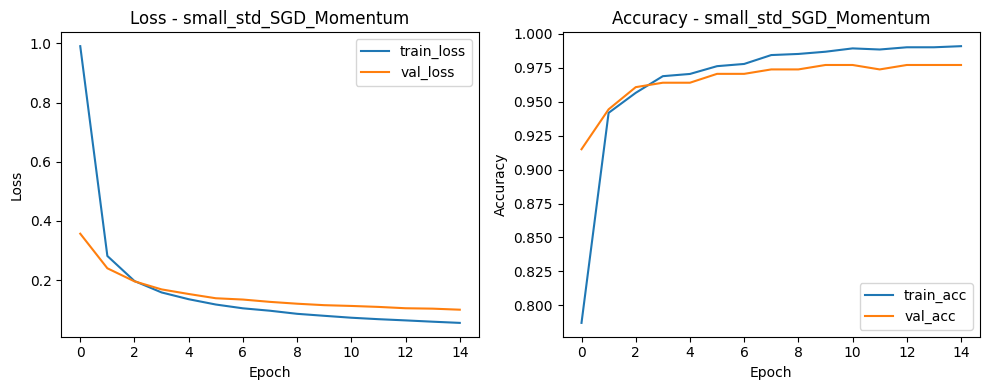

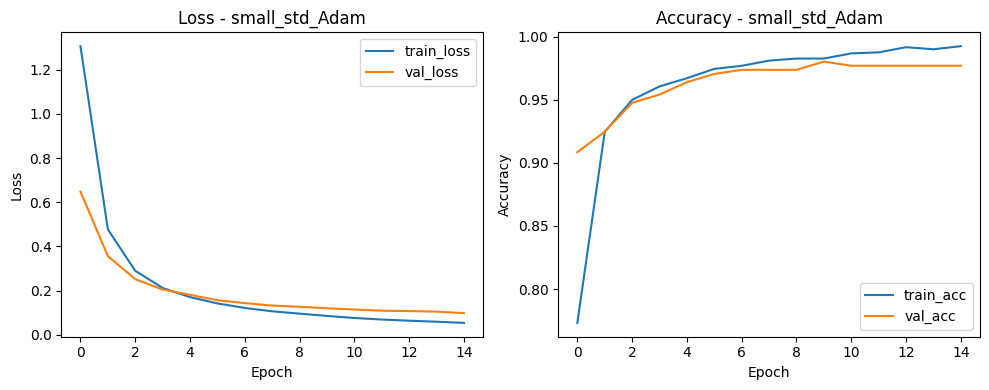

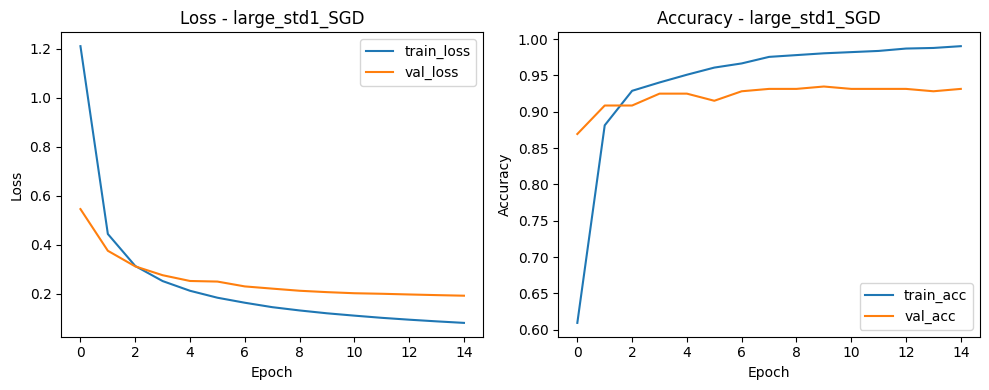

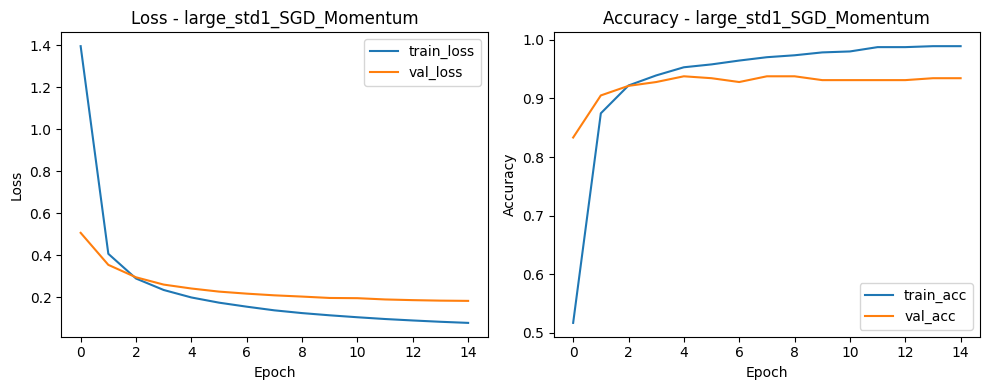

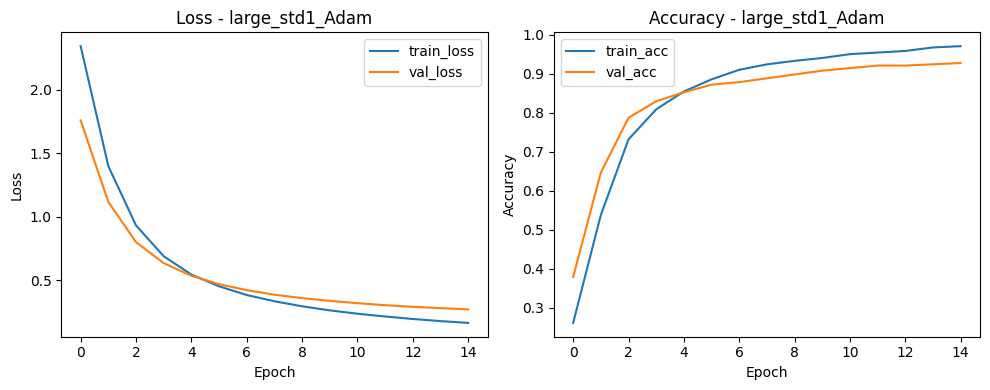

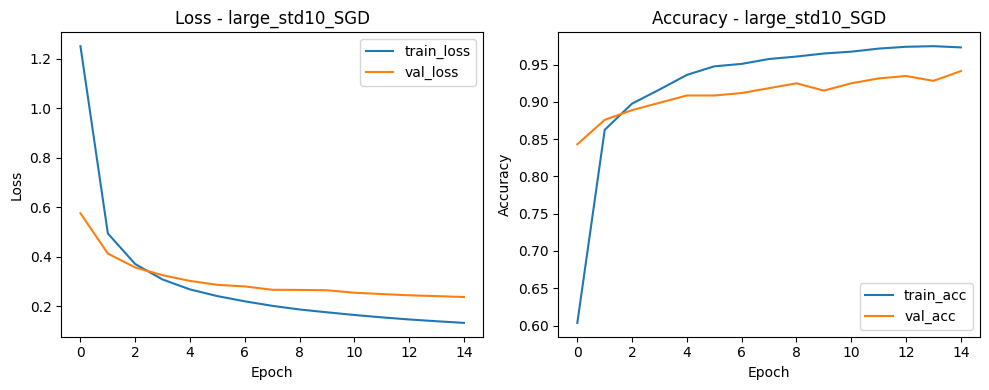

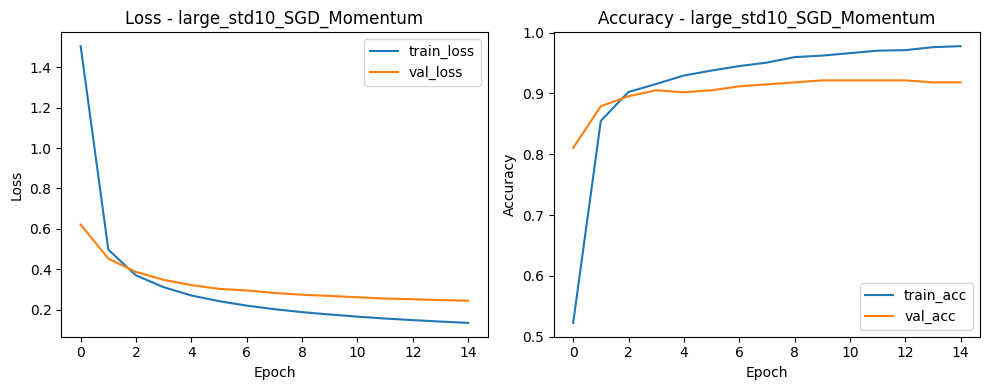

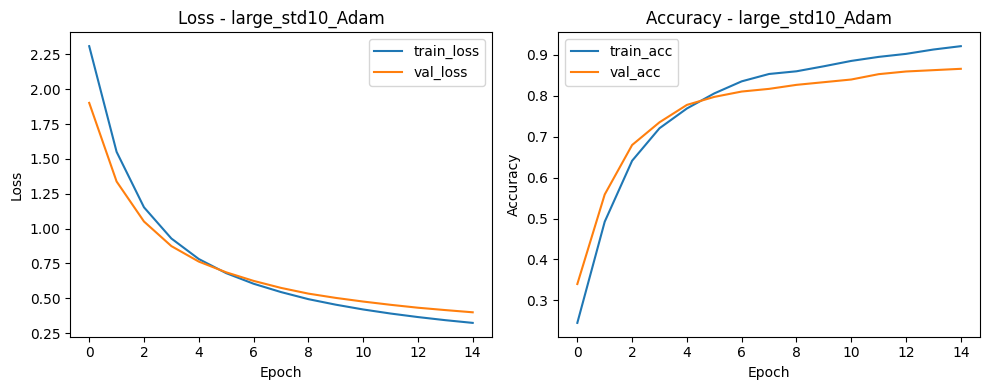

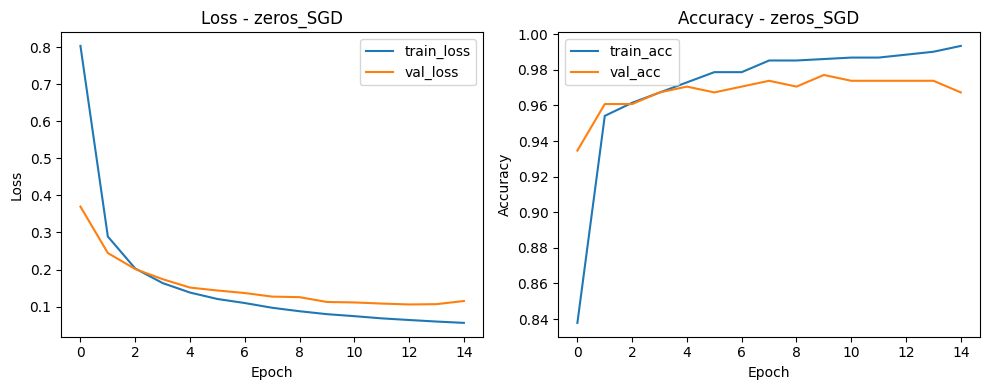

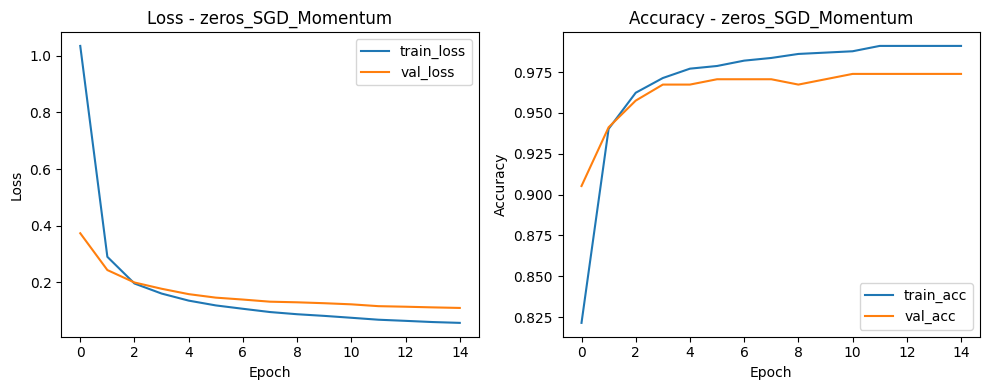

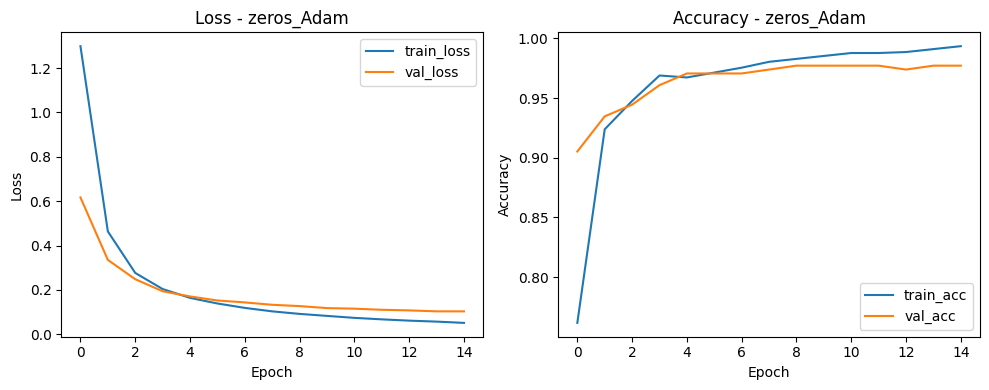

In [3]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd

digits = load_digits()
data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = Y_train.shape[1]

initializations = {
    "small_std": initializers.RandomNormal(stddev=1e-3),
    "large_std1": initializers.RandomNormal(stddev=1),
    "large_std10": initializers.RandomNormal(stddev=10),
    "zeros": initializers.Zeros()
}

optimizers_list = ["SGD", "SGD_Momentum", "Adam"]

results = {}

for init_name, init_value in initializations.items():
    for opt_name in optimizers_list:
        print(f"Training with init={init_name}, optimizer={opt_name}")

        if opt_name == "SGD":
            opt_value = SGD(learning_rate=0.1)
        elif opt_name == "SGD_Momentum":
            opt_value = SGD(learning_rate=0.01, momentum=0.9)
        elif opt_name == "Adam":
            opt_value = Adam()

        model = Sequential()
        model.add(Input(shape=(input_dim,)))
        model.add(Dense(hidden_dim, activation="tanh", kernel_initializer=init_value))
        model.add(Dense(output_dim, activation="softmax"))
        model.compile(optimizer=opt_value, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32, verbose=0)
        results[f"{init_name}_{opt_name}"] = history.history

for key, hist in results.items():
    history_df = pd.DataFrame(hist)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history_df['loss'], label='train_loss')
    plt.plot(history_df['val_loss'], label='val_loss')
    plt.title(f'Loss - {key}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history_df['accuracy'], label='train_acc')
    plt.plot(history_df['val_accuracy'], label='val_acc')
    plt.title(f'Accuracy - {key}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
